<a href="https://colab.research.google.com/github/DevBatra05/AIML_Sem_4/blob/main/Lab_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import files
ss=files.upload()

Saving japan_heart_attack_dataset.csv to japan_heart_attack_dataset.csv


In [5]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
Japan = pd.read_csv("japan_heart_attack_dataset.csv")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.feature_selection import VarianceThreshold


In [6]:
print(Japan.head())

   Age  Gender Region Smoking_History Diabetes_History Hypertension_History  \
0   56    Male  Urban             Yes               No                   No   
1   69    Male  Urban              No               No                   No   
2   46    Male  Rural             Yes               No                   No   
3   32  Female  Urban              No               No                   No   
4   60  Female  Rural              No               No                   No   

   Cholesterol_Level Physical_Activity Diet_Quality Alcohol_Consumption  ...  \
0         186.400209          Moderate         Poor                 Low  ...   
1         185.136747               Low         Good                 Low  ...   
2         210.696611               Low      Average            Moderate  ...   
3         211.165478          Moderate         Good                High  ...   
4         223.814253              High         Good                High  ...   

   Extra_Column_6  Extra_Column_7  Extra_Col

In [7]:
print(Japan.columns)

Index(['Age', 'Gender', 'Region', 'Smoking_History', 'Diabetes_History',
       'Hypertension_History', 'Cholesterol_Level', 'Physical_Activity',
       'Diet_Quality', 'Alcohol_Consumption', 'Stress_Levels', 'BMI',
       'Heart_Rate', 'Systolic_BP', 'Diastolic_BP', 'Family_History',
       'Heart_Attack_Occurrence', 'Extra_Column_1', 'Extra_Column_2',
       'Extra_Column_3', 'Extra_Column_4', 'Extra_Column_5', 'Extra_Column_6',
       'Extra_Column_7', 'Extra_Column_8', 'Extra_Column_9', 'Extra_Column_10',
       'Extra_Column_11', 'Extra_Column_12', 'Extra_Column_13',
       'Extra_Column_14', 'Extra_Column_15'],
      dtype='object')


In [8]:
import pandas as pd

Employee = pd.read_csv("japan_heart_attack_dataset.csv")  # Ensure the file exists
data = Employee.drop(columns=['Cholesterol_Level'])# Replace with actual column name
target = Employee['Cholesterol_Level']

Missing values found, plotting missing values...


<ipython-input-9-daacd5bc68cb>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_percent[missing_percent > 0].index,


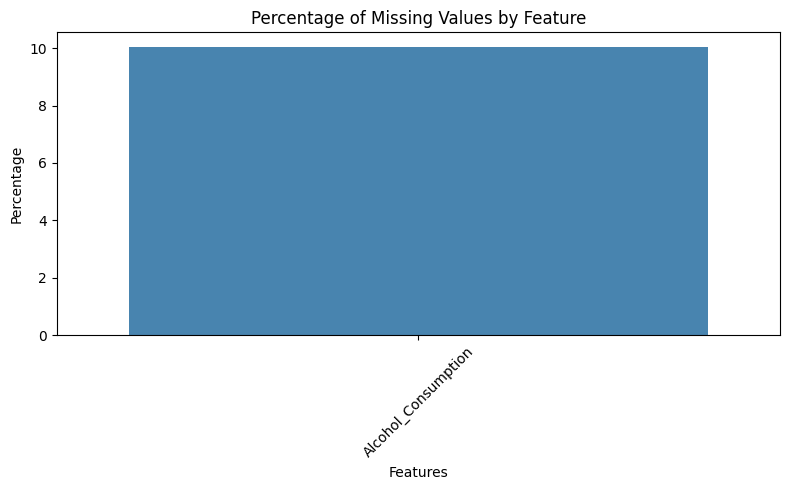

Missing values imputed successfully.
   Age  Gender Region Smoking_History Diabetes_History Hypertension_History  \
0   56    Male  Urban             Yes               No                   No   
1   69    Male  Urban              No               No                   No   
2   46    Male  Rural             Yes               No                   No   
3   32  Female  Urban              No               No                   No   
4   60  Female  Rural              No               No                   No   

  Physical_Activity Diet_Quality Alcohol_Consumption  Stress_Levels  ...  \
0          Moderate         Poor                 Low       3.644786  ...   
1               Low         Good                 Low       3.384056  ...   
2               Low      Average            Moderate       3.810911  ...   
3          Moderate         Good                High       6.014878  ...   
4              High         Good                High       6.806883  ...   

   Extra_Column_6  Extra_Column

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
Employee = pd.read_csv("japan_heart_attack_dataset.csv")  # Ensure the file exists

# Separate features (excluding the target column)
data = Employee.drop(columns=['Cholesterol_Level'])  # Replace with actual column name
target = Employee['Cholesterol_Level']

# Check for missing values
missing_percent = data.isnull().mean() * 100

plt.figure(figsize=(8, 5))
if missing_percent.sum() > 0:
    print("Missing values found, plotting missing values...")

    # Plot missing values
    sns.barplot(x=missing_percent[missing_percent > 0].index,
                y=missing_percent[missing_percent > 0].values,
                palette='Blues_d')
    plt.title('Percentage of Missing Values by Feature')
    plt.ylabel('Percentage')
    plt.xlabel('Features')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Separate numeric and categorical columns
    numeric_cols = data.select_dtypes(include=[np.number])
    categorical_cols = data.select_dtypes(exclude=[np.number])

    # Impute missing values
    numeric_cols.fillna(numeric_cols.median(), inplace=True)  # For numeric columns
    categorical_cols.fillna(categorical_cols.mode().iloc[0], inplace=True)  # For categorical

    # Merge back
    data[numeric_cols.columns] = numeric_cols
    data[categorical_cols.columns] = categorical_cols

    print("Missing values imputed successfully.")
else:
    print("No missing values detected.")
    plt.title('No Missing Values in the Dataset')
    plt.show()

# Display updated dataset
print(data.head())

In [10]:
# Check for duplicate rows and remove them
duplicates = data.duplicated().sum()
if duplicates > 0:
    print(f"Found {duplicates} duplicate rows. Removing duplicates.")
    data.drop_duplicates(inplace=True)

print(f"Data shape after cleaning: {data.shape}")

Data shape after cleaning: (30000, 31)


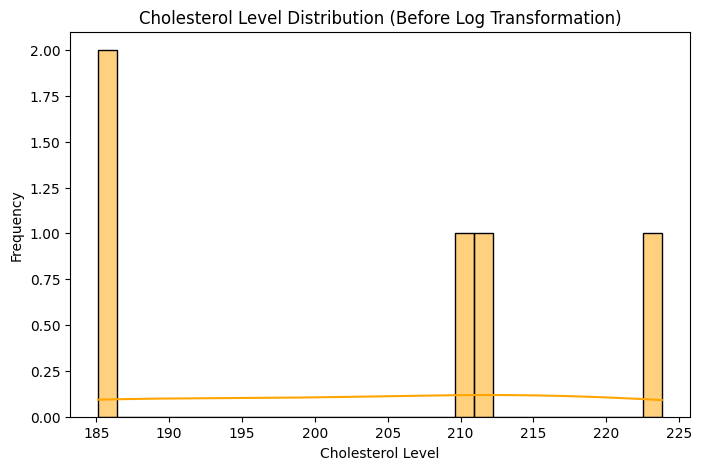

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np  # Import NumPy

# Example DataFrame
data = pd.DataFrame({'Cholesterol_Level': [186.400209, 185.136747, 210.696611, 211.165478, 223.814253]})

# Fixing the plot title and ensuring proper syntax
plt.figure(figsize=(8, 5))
sns.histplot(data['Cholesterol_Level'], kde=True, bins=30, color='orange')
plt.title('Cholesterol Level Distribution (Before Log Transformation)')
plt.xlabel('Cholesterol Level')
plt.ylabel('Frequency')

plt.show()


In [16]:
import numpy as np
data['Cholesterol_Level'] = np.log1p(data['Cholesterol_Level'])

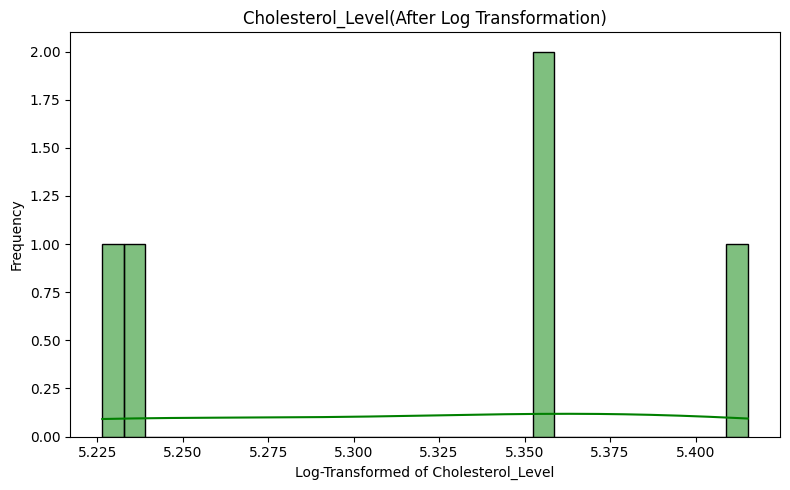

In [17]:
plt.figure(figsize=(8, 5))
sns.histplot(data['Cholesterol_Level'], kde=True, bins=30, color='green')
plt.title('Cholesterol_Level(After Log Transformation)')
plt.xlabel('Log-Transformed of Cholesterol_Level')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [18]:
from sklearn.preprocessing import StandardScaler, PowerTransformer

In [19]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Sample data
data = pd.DataFrame({
    'Cholesterol_Level': [
        186.400208841376,
        185.136747283012,
        210.696610762769,
        211.165478181655,
        223.814253363022,
        220.340040422730,
        176.534858592449
    ],
    'Stress_Levels': [
        3.64478643744421,
        3.38405576736025,
        3.81091056570455,
        6.01487756171736,
        6.8068829817958,
        8.20723253760484,
        4.59436772095729,

    ]
})
# Define numerical columns to scale
numerical_cols = [ 'Cholesterol_Level','Stress_Levels']

# Apply StandardScaler
scaler = StandardScaler()
scaled_features = pd.DataFrame(scaler.fit_transform(data[numerical_cols]), columns=numerical_cols)

# Display the scaled features
print(scaled_features)

   Cholesterol_Level  Stress_Levels
0          -0.891243      -0.918509
1          -0.963369      -1.071609
2           0.495732      -0.820962
3           0.522498       0.473198
4           1.244561       0.938261
5           1.046233       1.760540
6          -1.454413      -0.360919


In [20]:
data = pd.concat([scaled_features, data['Cholesterol_Level']], axis=1)

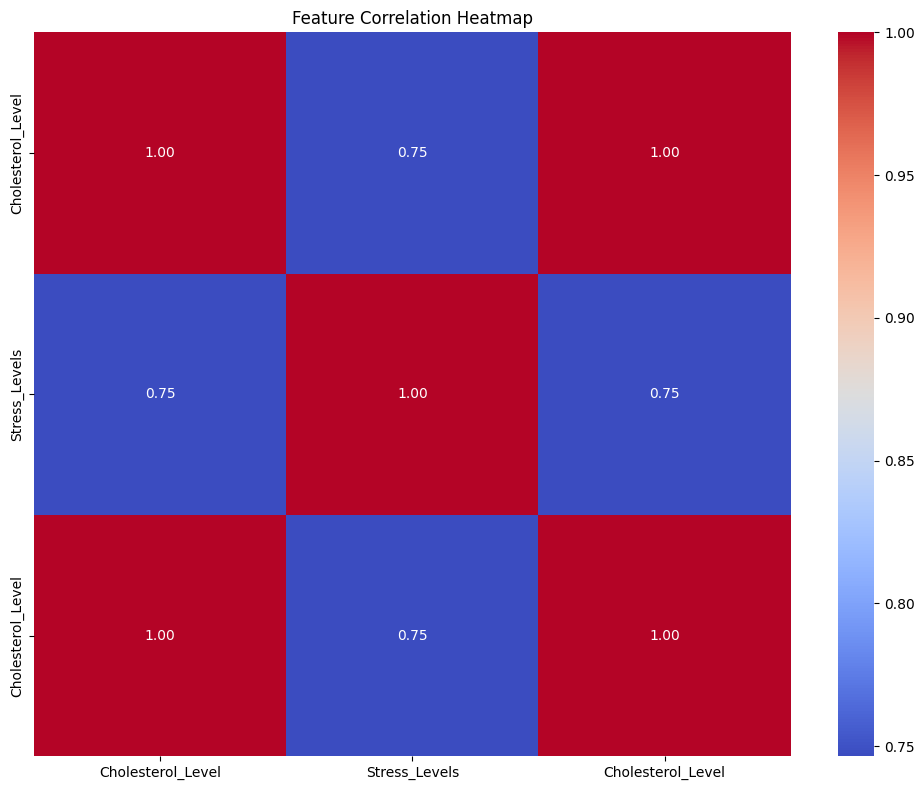

In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

In [22]:
# Squareroot transformation
data['Cholesterol_Level'] = np.sqrt(data['Cholesterol_Level'])

/usr/local/lib/python3.11/dist-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: invalid value encountered in sqrt
  result = func(self.values, **kwargs)


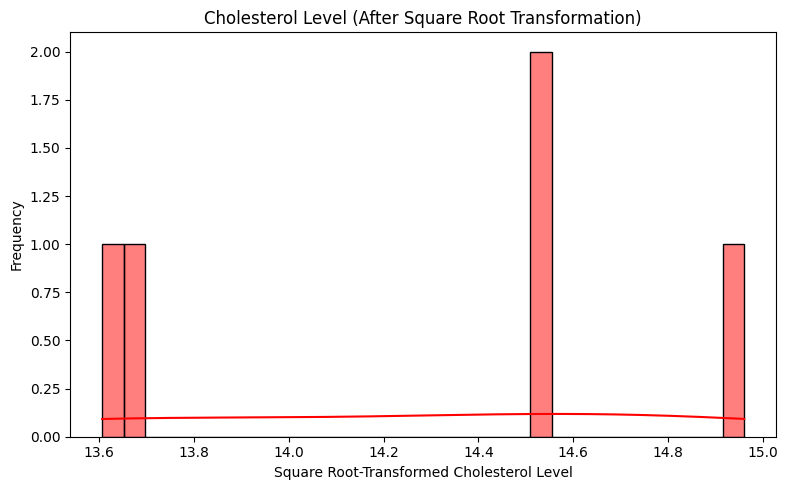

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np  # Import NumPy for transformation

# Example DataFrame (Fresh Dataset)
data = pd.DataFrame({'Cholesterol_Level': [186.400209, 185.136747, 210.696611, 211.165478, 223.814253]})

# Apply Square Root Transformation
data['Sqrt_Cholesterol_Level'] = np.sqrt(data['Cholesterol_Level'])

# Plot the histogram of the square root-transformed Cholesterol_Level
plt.figure(figsize=(8, 5))
sns.histplot(data['Sqrt_Cholesterol_Level'], kde=True, bins=30, color='red')
plt.title('Cholesterol Level (After Square Root Transformation)')
plt.xlabel('Square Root-Transformed Cholesterol Level')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()



In [25]:
data['Cholesterol_Level'] = 1 / data['Cholesterol_Level']

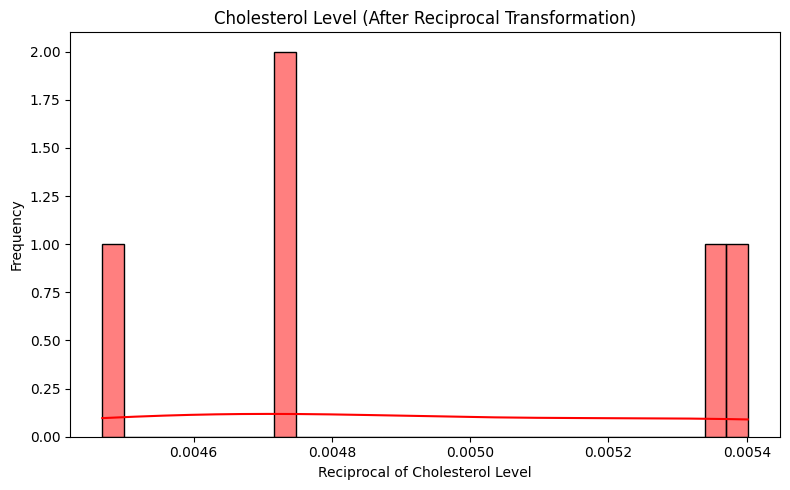

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np  # Import NumPy for transformation

# Example DataFrame (Fresh Dataset)
data = pd.DataFrame({'Cholesterol_Level': [186.400209, 185.136747, 210.696611, 211.165478, 223.814253]})

# Apply Reciprocal Transformation (Avoiding division by zero)
data['Reciprocal_Cholesterol_Level'] = 1 / data['Cholesterol_Level']

# Plot the histogram of the reciprocal-transformed Cholesterol_Level
plt.figure(figsize=(8, 5))
sns.histplot(data['Reciprocal_Cholesterol_Level'], kde=True, bins=30, color='red')
plt.title('Cholesterol Level (After Reciprocal Transformation)')
plt.xlabel('Reciprocal of Cholesterol Level')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()



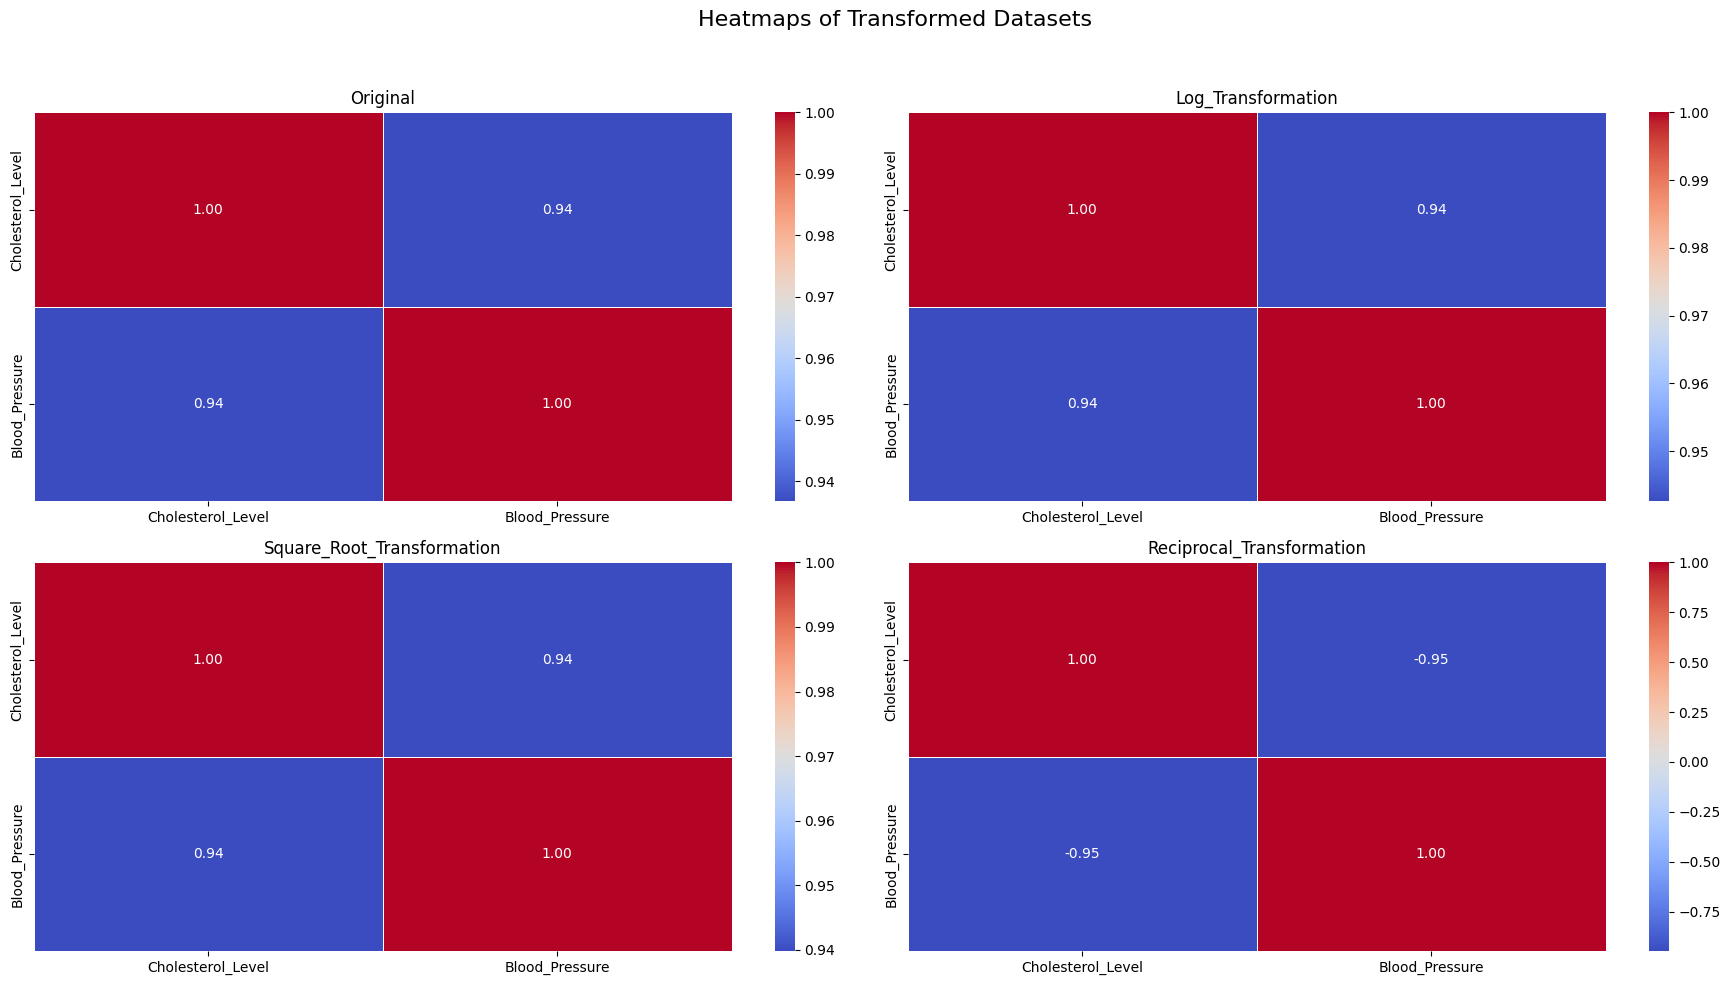

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Example Fresh Dataset
data = pd.DataFrame({
    'Cholesterol_Level': [186.400209, 185.136747, 210.696611, 211.165478, 223.814253],
    'Blood_Pressure': [120, 122, 135, 140, 138]  # Another variable for correlation calculation
})

# Creating a dictionary of transformed datasets
transformed_datasets = {
    'Original': data.copy(),
    'Log_Transformation': data.copy(),
    'Square_Root_Transformation': data.copy(),
    'Reciprocal_Transformation': data.copy()
}

# Applying transformations
transformed_datasets['Log_Transformation']['Cholesterol_Level'] = np.log1p(data['Cholesterol_Level'])
transformed_datasets['Square_Root_Transformation']['Cholesterol_Level'] = np.sqrt(data['Cholesterol_Level'])
transformed_datasets['Reciprocal_Transformation']['Cholesterol_Level'] = 1 / data['Cholesterol_Level']

# Set up the figure layout for heatmaps
fig, axes = plt.subplots(2, 2, figsize=(18, 10))  # Adjusted for 4 heatmaps (change 2,3 to 2,2)
fig.suptitle("Heatmaps of Transformed Datasets", fontsize=16)

# Create heatmaps for each transformation
for ax, (key, dataset) in zip(axes.flat, transformed_datasets.items()):
    sns.heatmap(dataset.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, ax=ax)
    ax.set_title(key)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [30]:
from sklearn.feature_selection import VarianceThreshold

# -------------------- Data Reduction --------------------
# Variance thresholding to remove low-variance features
selector = VarianceThreshold(threshold=0.01)

# Ensure only numerical features are selected
numerical_features = data.select_dtypes(include=['number'])

# Apply variance threshold
reduced_features = selector.fit_transform(numerical_features)

# Get the names of the selected columns
selected_columns = numerical_features.columns[selector.get_support(indices=True)]

# Create a new DataFrame with only selected features
reduced_data = pd.DataFrame(reduced_features, columns=selected_columns)

# Display the reduced features and selected columns
print("Selected Columns:", list(selected_columns))
print("Reduced Data Shape:", reduced_data.shape)


Selected Columns: ['Cholesterol_Level', 'Blood_Pressure']
Reduced Data Shape: (5, 2)


In [31]:
# Update the data with reduced features
data = pd.DataFrame(reduced_features, columns=selected_columns)
data['Cholesterol_Level'] = target  # Re-attach the target column

print(f"Number of features after variance thresholding: {data.shape[1] - 1}")

Number of features after variance thresholding: 1


Original Training features shape: (4, 1)
Reduced Training features shape: (4, 1)
Original Testing features shape: (1, 1)
Reduced Testing features shape: (1, 1)


<ipython-input-32-db8846307250>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=X_train_numeric.columns, y=variances, palette='Blues_d')


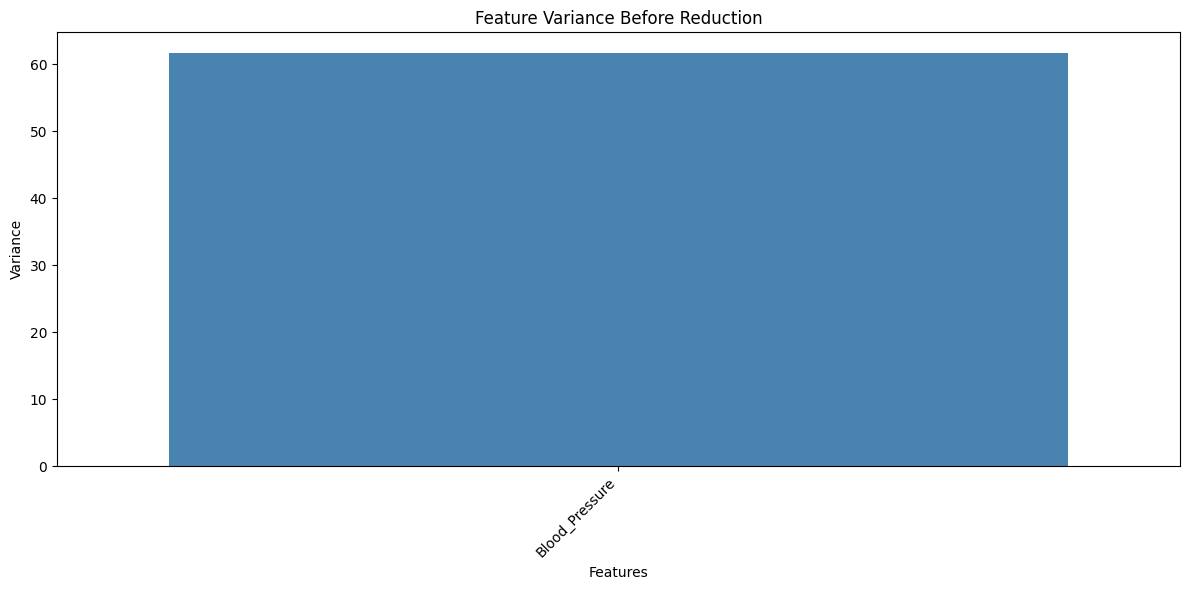

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

# -------------------- Data Splitting --------------------
# Ensure 'Cholesterol_Level' exists before dropping
if 'Cholesterol_Level' in data.columns:
    X = data.drop(columns=['Cholesterol_Level'])  # Features
    y = data['Cholesterol_Level']  # Target
else:
    raise KeyError("Column 'Cholesterol_Level' not found in the dataset!")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -------------------- Variance Thresholding --------------------
# Ensure only numerical features are used
X_train_numeric = X_train.select_dtypes(include=['number'])

# Apply variance threshold
selector = VarianceThreshold(threshold=0.01)
selector.fit(X_train_numeric)  # Fit the selector on the training data

# Get selected feature names
selected_columns = X_train_numeric.columns[selector.get_support(indices=True)]
X_train_reduced = pd.DataFrame(selector.transform(X_train_numeric), columns=selected_columns)
X_test_reduced = pd.DataFrame(selector.transform(X_test[selected_columns]), columns=selected_columns)

# -------------------- Output Summary --------------------
print(f"Original Training features shape: {X_train.shape}")
print(f"Reduced Training features shape: {X_train_reduced.shape}")
print(f"Original Testing features shape: {X_test.shape}")
print(f"Reduced Testing features shape: {X_test_reduced.shape}")

# -------------------- Visualize Feature Variances --------------------
variances = selector.variances_

# Plot the variances
plt.figure(figsize=(12, 6))
sns.barplot(x=X_train_numeric.columns, y=variances, palette='Blues_d')
plt.title('Feature Variance Before Reduction')
plt.ylabel('Variance')
plt.xlabel('Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [33]:
# -------------------- Data Splitting --------------------
# Split into features (X) and target (y)
X = data.drop(columns=['Cholesterol_Level'])
y = data['Cholesterol_Level']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -------------------- Output Summary --------------------
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")

Training features shape: (4, 1)
Testing features shape: (1, 1)


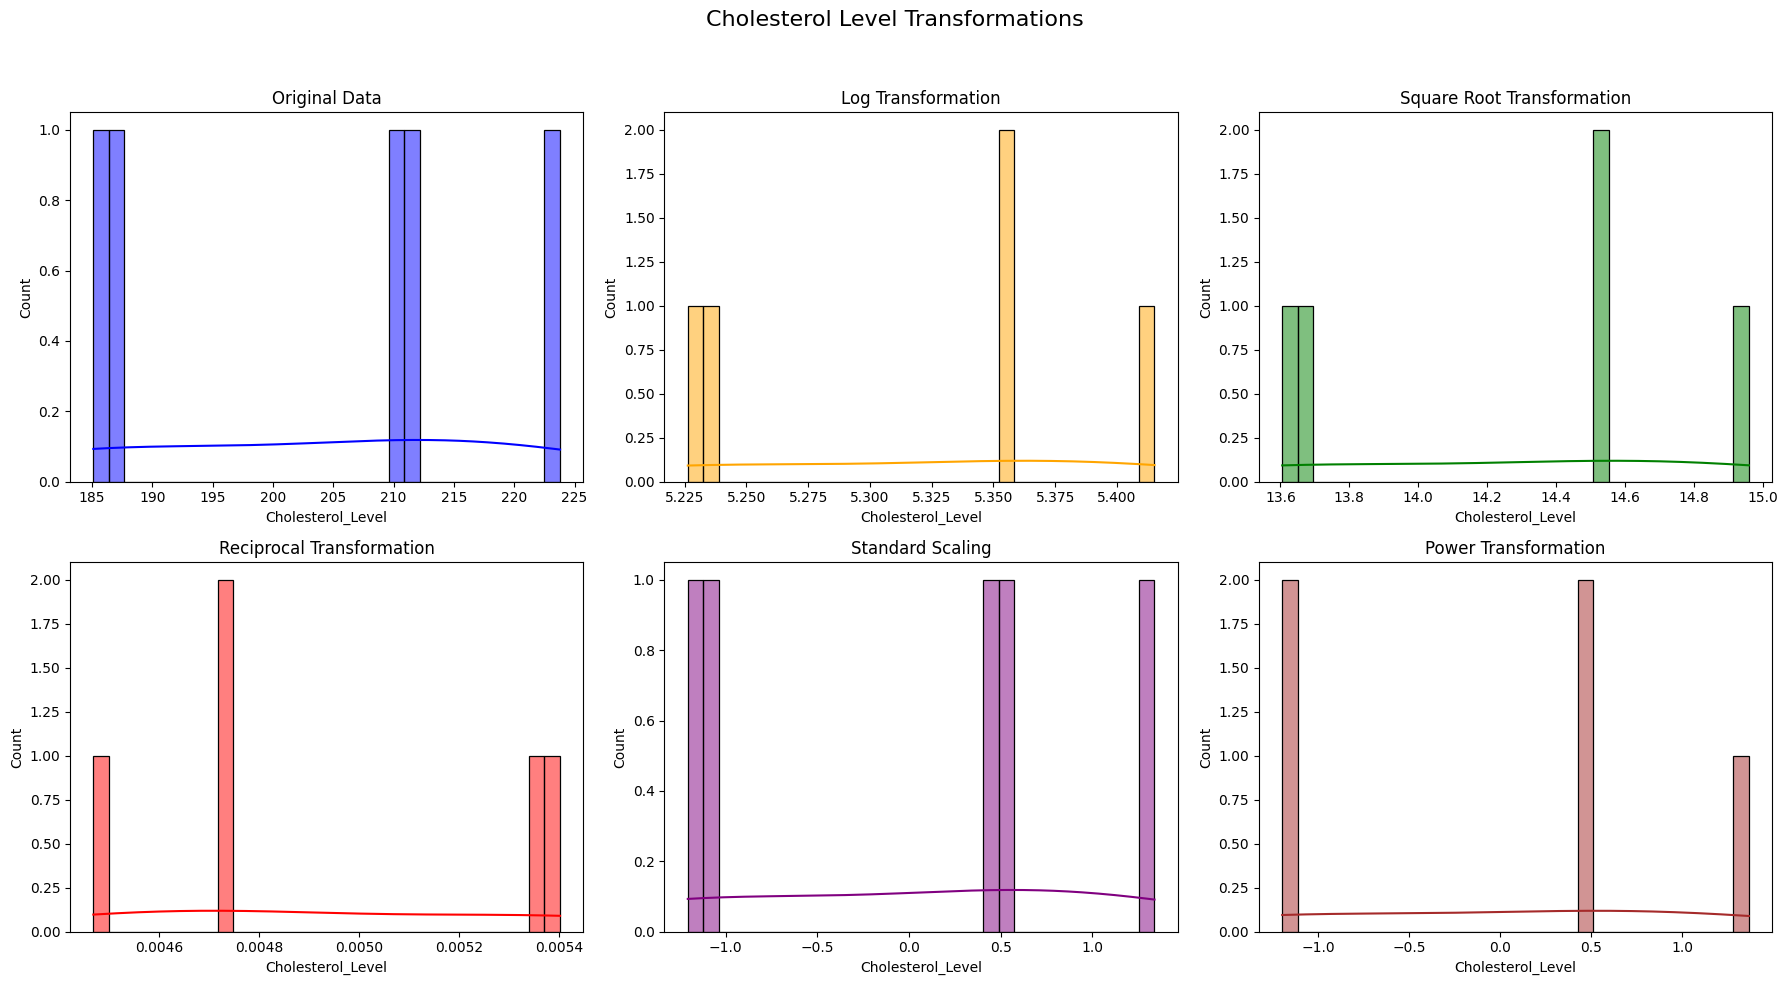

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, PowerTransformer

# Example Dataset
data = pd.DataFrame({'Cholesterol_Level': [186.4, 185.1, 210.7, 211.2, 223.8]})

# Dictionary to store transformed datasets
transformed_datasets = {
    'Original': data.copy(),
    'Log_Transformation': data.copy(),
    'Square_Root_Transformation': data.copy(),
    'Reciprocal_Transformation': data.copy(),
    'Standard_Scaling': data.copy(),
    'Power_Transformation': data.copy()
}

# Apply transformations
transformed_datasets['Log_Transformation']['Cholesterol_Level'] = np.log1p(data['Cholesterol_Level'])
transformed_datasets['Square_Root_Transformation']['Cholesterol_Level'] = np.sqrt(data['Cholesterol_Level'])
transformed_datasets['Reciprocal_Transformation']['Cholesterol_Level'] = 1 / data['Cholesterol_Level']

# Standard Scaling
scaler = StandardScaler()
transformed_datasets['Standard_Scaling']['Cholesterol_Level'] = scaler.fit_transform(data[['Cholesterol_Level']])

# Power Transformation (Box-Cox or Yeo-Johnson)
power_transformer = PowerTransformer(method='yeo-johnson')  # Box-Cox requires positive values only
transformed_datasets['Power_Transformation']['Cholesterol_Level'] = power_transformer.fit_transform(data[['Cholesterol_Level']])

# Set up the figure layout
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle("Cholesterol Level Transformations", fontsize=16)

# Titles for each subplot
titles = [
    "Original Data", "Log Transformation", "Square Root Transformation",
    "Reciprocal Transformation", "Standard Scaling", "Power Transformation"
]

# Colors for histograms
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']

# Plot histograms for each transformation
for ax, (key, color, title) in zip(axes.flat, zip(transformed_datasets.keys(), colors, titles)):
    sns.histplot(transformed_datasets[key]['Cholesterol_Level'], kde=True, bins=30, ax=ax, color=color)
    ax.set_title(title)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


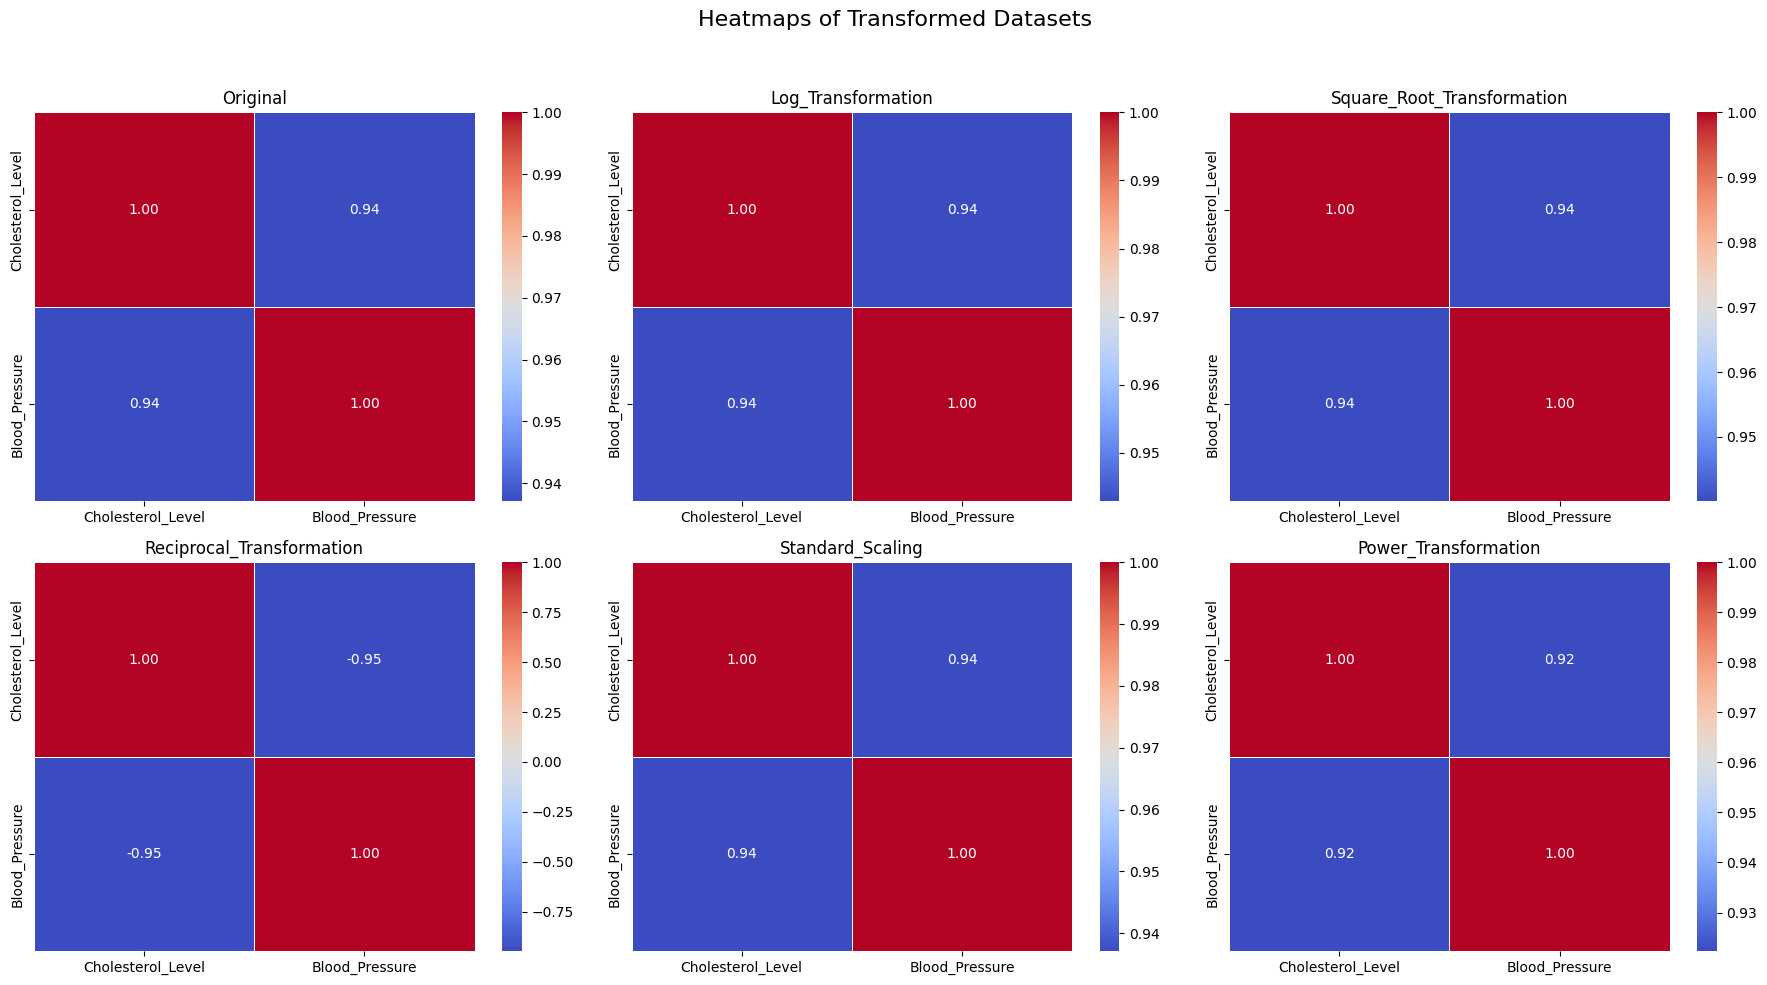

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, PowerTransformer

# Example Dataset with Additional Numerical Column
data = pd.DataFrame({
    'Cholesterol_Level': [186.4, 185.1, 210.7, 211.2, 223.8],
    'Blood_Pressure': [120, 122, 135, 140, 138]  # Added column for correlation
})

# Dictionary to store transformed datasets
transformed_datasets = {
    'Original': data.copy(),
    'Log_Transformation': data.copy(),
    'Square_Root_Transformation': data.copy(),
    'Reciprocal_Transformation': data.copy(),
    'Standard_Scaling': data.copy(),
    'Power_Transformation': data.copy()
}

# Apply transformations
transformed_datasets['Log_Transformation']['Cholesterol_Level'] = np.log1p(data['Cholesterol_Level'])
transformed_datasets['Square_Root_Transformation']['Cholesterol_Level'] = np.sqrt(data['Cholesterol_Level'])
transformed_datasets['Reciprocal_Transformation']['Cholesterol_Level'] = 1 / data['Cholesterol_Level']

# Standard Scaling
scaler = StandardScaler()
transformed_datasets['Standard_Scaling'][['Cholesterol_Level', 'Blood_Pressure']] = scaler.fit_transform(data)

# Power Transformation (Yeo-Johnson)
power_transformer = PowerTransformer(method='yeo-johnson')
transformed_datasets['Power_Transformation'][['Cholesterol_Level', 'Blood_Pressure']] = power_transformer.fit_transform(data)

# Set up the figure layout for heatmaps
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle("Heatmaps of Transformed Datasets", fontsize=16)

# Create heatmaps for each transformation
for ax, (key, dataset) in zip(axes.flat, transformed_datasets.items()):
    correlation_matrix = dataset.corr().dropna(how='all', axis=1).dropna(how='all', axis=0)  # Drop NaNs
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, ax=ax)
    ax.set_title(key)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
